In [5]:
import numpy as np
import pandas as pd
import scipy
import re
import matplotlib.pyplot as plt
import string
import nltk
import warnings
import collections
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords

In [6]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

In [7]:
#Loading the dataset

Twitter_Dataset = pd.read_csv(r"C:\Users\Public\Twitter_dataset.csv", encoding='latin1')

#printing top 5 rows of the dataset 
Twitter_Dataset.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


In [8]:
#Extracting necessary columns only 

Twitter_Dataset_Final = Twitter_Dataset[["text","sentiment"]]
Twitter_Dataset_Final.head()

,text,sentiment
0,Two places I'd invest all my money if I could:...,5
1,Awesome! Google driverless cars will help the ...,5
2,If Google maps can't keep up with road constru...,2
3,Autonomous cars seem way overhyped given the t...,2
4,Just saw Google self-driving car on I-34. It w...,3


In [9]:
#Counting the number of occurances of different values in the sentiment column

Twitter_Dataset_Final['sentiment'].value_counts()

3               4245
4               1444
2                685
5                459
not_relevant     213
1                110
Name: sentiment, dtype: int64

In [10]:
#Removing null values

Twitter_Dataset_Final = Twitter_Dataset_Final[Twitter_Dataset_Final['sentiment'].notna() & 
                                              (Twitter_Dataset_Final['sentiment'] != 'not_relevant')]
Twitter_Dataset_Final['sentiment'].value_counts()

3    4245
4    1444
2     685
5     459
1     110
Name: sentiment, dtype: int64

In [11]:
#combining "very negative" and "negative" as "negative" 
#combining "very positive" and "positive" as "positive" 

Twitter_Dataset_Final['sentiment'] = Twitter_Dataset_Final['sentiment'].replace(['1'], ['-1'])
Twitter_Dataset_Final['sentiment'] = Twitter_Dataset_Final['sentiment'].replace(['2'], ['-1'])
Twitter_Dataset_Final['sentiment'] = Twitter_Dataset_Final['sentiment'].replace(['3'], ['0'])
Twitter_Dataset_Final['sentiment'] = Twitter_Dataset_Final['sentiment'].replace(['4'], ['1'])
Twitter_Dataset_Final['sentiment'] = Twitter_Dataset_Final['sentiment'].replace(['5'], ['1'])
Twitter_Dataset_Final['sentiment'].value_counts()

0     4245
1     1903
-1     795
Name: sentiment, dtype: int64

In [12]:
#EDA

import pandas as pd


# 1. Displaying the first 5 rows of the dataset to get a quick look
print("First 5 rows of the dataset:")
print(Twitter_Dataset_Final.head())

# 2. Displaying the dimensions of the dataset
print("\nDataset Dimensions:")
print(f"Number of Rows: {Twitter_Dataset_Final.shape[0]}")
print(f"Number of Columns: {Twitter_Dataset_Final.shape[1]}")

# 3. Displaying column names
print("\nColumn Names:")
print(Twitter_Dataset_Final.columns)

# 4. Displaying data types for each column
print("\nData Types:")
print(Twitter_Dataset_Final.dtypes)

# 5. Checking for missing values
print("\nMissing Values:")
print(Twitter_Dataset_Final.isnull().sum())


First 5 rows of the dataset:
                                                text sentiment
0  Two places I'd invest all my money if I could:...         1
1  Awesome! Google driverless cars will help the ...         1
2  If Google maps can't keep up with road constru...        -1
3  Autonomous cars seem way overhyped given the t...        -1
4  Just saw Google self-driving car on I-34. It w...         0

Dataset Dimensions:
Number of Rows: 6943
Number of Columns: 2

Column Names:
Index(['text', 'sentiment'], dtype='object')

Data Types:
text         object
sentiment    object
dtype: object

Missing Values:
text         0
sentiment    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6943 entries, 0 to 7145
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       6943 non-null   object
 1   sentiment  6943 non-null   object
dtypes: object(2)
memory usage: 162.7+ KB
None
                            text sentiment
count                       6943      6943
unique                      6933         3
top     Just saw the google car!         0
freq                           5      4245


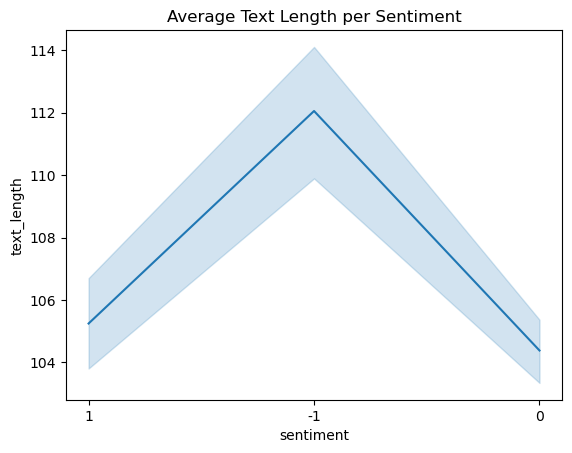

Word Cloud for Sentiment: 1


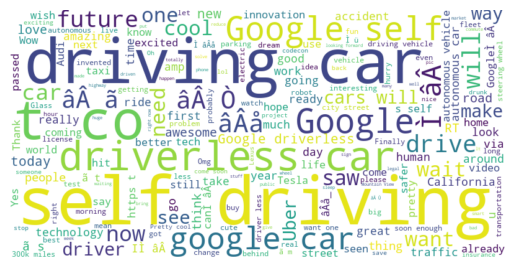

Word Cloud for Sentiment: -1


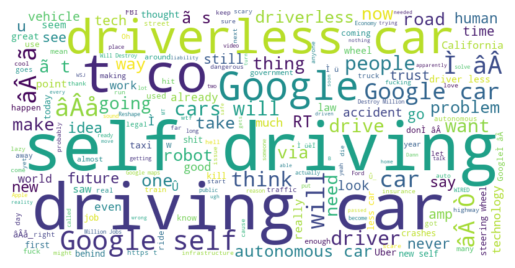

Word Cloud for Sentiment: 0


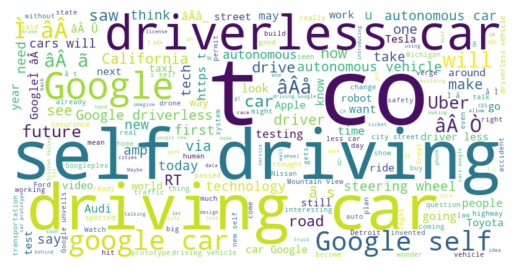

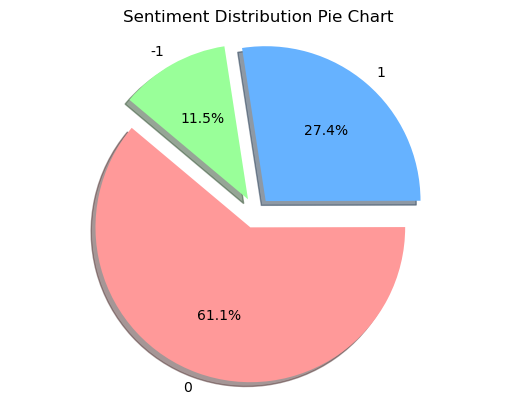

In [13]:
#EDA


import seaborn as sns
from wordcloud import WordCloud

#Geting an overview of the dataset
print(Twitter_Dataset_Final.info())
print(Twitter_Dataset_Final.describe())

Twitter_Dataset_Final['text_length'] = Twitter_Dataset_Final['text'].apply(len)
sns.lineplot(data=Twitter_Dataset_Final, x='sentiment', y='text_length')
plt.title('Average Text Length per Sentiment')
plt.savefig('C:\\Users\\SAHIL BHARTI\\Desktop\\Dissertation docs\\Results\\sentiment_count.jpg')
plt.show()

def generate_word_cloud(text, sentiment_label):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    file_path = f'C:\\Users\\SAHIL BHARTI\\Desktop\\Dissertation docs\\Results\\word_cloud_{sentiment_label}.jpg'
    plt.savefig(file_path)
    plt.show()
    

for sentiment in Twitter_Dataset_Final['sentiment'].unique():
    print(f"Word Cloud for Sentiment: {sentiment}")
    subset = Twitter_Dataset_Final[Twitter_Dataset_Final['sentiment'] == sentiment]
    text = " ".join(subset['text'])
    generate_word_cloud(text, sentiment)

sentiment_counts = Twitter_Dataset_Final['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['#FF9999', '#66B2FF', '#99FF99']
explode = (0.1, 0.1, 0.1)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution Pie Chart')
plt.savefig('C:\\Users\\SAHIL BHARTI\\Desktop\\Dissertation docs\\Results\\sentiment_percent.jpg')
plt.show()


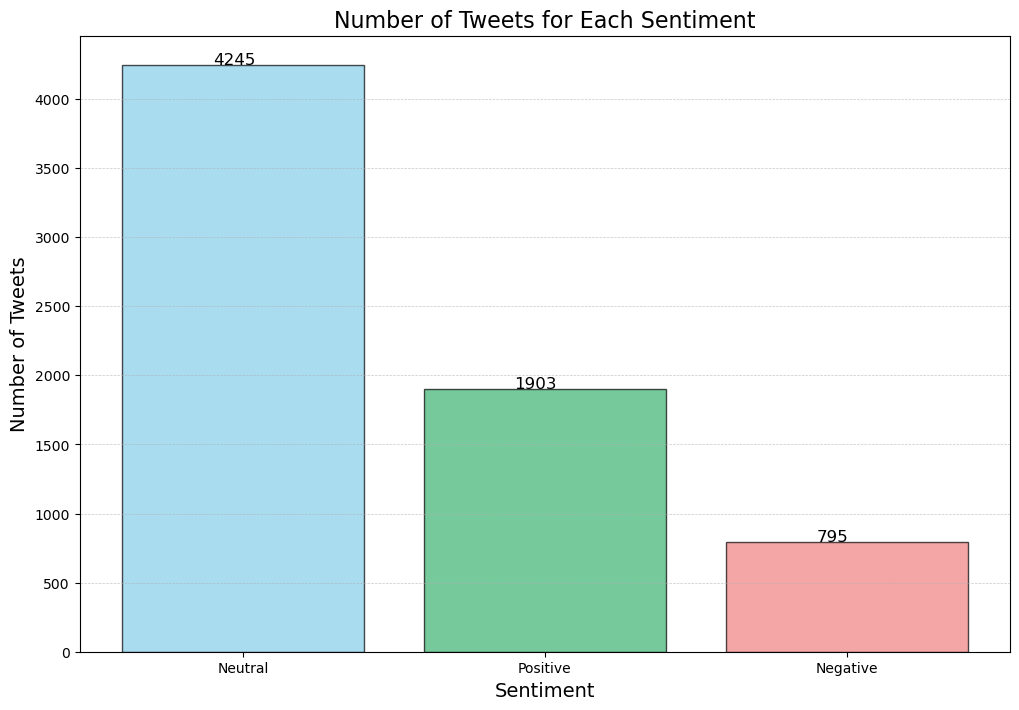

In [14]:
#EDA


# Counting the number of tweets for each sentiment
sentiment_counts = Twitter_Dataset_Final['sentiment'].value_counts()
Twitter_Dataset_Final['sentiment'].value_counts()

# Renaming index for better visualization
labels = ['Neutral' if sentiment == '0' else 'Positive' if sentiment == '1' else 'Negative' for sentiment in sentiment_counts.index]

colors = ['skyblue', 'mediumseagreen', 'lightcoral']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(labels, sentiment_counts, color=colors, alpha=0.7, edgecolor='black')
for bar, value in zip(bars, sentiment_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, value + 5, str(value), fontsize=12)


plt.title('Number of Tweets for Each Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

# Adding grid lines for better readability of the y-axis
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('C:\\Users\\SAHIL BHARTI\\Desktop\\Dissertation docs\\Results\\sentiment_numbers.jpg')
plt.show()


In [15]:
#removing any HTML markup from the dataframe

def html_decode(row):
    text_in_row = row['text']
    if '<' in text_in_row and '>' in text_in_row:  # Check if the text contains HTML markup
        soup = BeautifulSoup(text_in_row, 'html.parser')
        text_decoded = soup.get_text()
        text_in_row.loc['text'] = text_decoded
    return row

Twitter_Dataset_Final = Twitter_Dataset_Final.apply(html_decode, axis=1)


In [16]:
#Removing URLs &non-alpha-numeric characters, Negation handling, Converting to lower-case

def text_cleaning(words):
    # Remove URLs
    words = re.sub(r'(http|https)?:\/\/\S+', '', words)
    # Remove non-alpha-numeric characters, @, #
    words = re.sub(r'[^a-zA-Z0-9\s]', '', words)
    # Negation handling
    words = re.sub(r"n't", " not", words)
    words = re.sub(r"'s", " is", words)
    # Converting to lower-case
    words = words.lower()
    return words

Twitter_Dataset_Final['text_cleaned'] = Twitter_Dataset_Final['text'].apply(text_cleaning)
Twitter_Dataset_Final.head()

,text,sentiment,text_length,text_cleaned
0,Two places I'd invest all my money if I could:...,1,83,two places id invest all my money if i could 3...
1,Awesome! Google driverless cars will help the ...,1,95,awesome google driverless cars will help the b...
2,If Google maps can't keep up with road constru...,-1,116,if google maps cant keep up with road construc...
3,Autonomous cars seem way overhyped given the t...,-1,118,autonomous cars seem way overhyped given the t...
4,Just saw Google self-driving car on I-34. It w...,0,72,just saw google selfdriving car on i34 it was ...


In [17]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\SAHIL
[nltk_data]     BHARTI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SAHIL
[nltk_data]     BHARTI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Removing Stopwords

stopwords_set = set(stopwords.words('english'))

def stopword_removal(text):
    words = nltk.word_tokenize(text)
    filtered_words = [words for words in words if words not in stopwords_set]
    return ' '.join(filtered_words)

Twitter_Dataset_Final['text_cleaned'] = Twitter_Dataset_Final['text_cleaned'].apply(stopword_removal)

In [19]:
#Tokenization

Twitter_Dataset_Final['tokens'] = Twitter_Dataset_Final['text_cleaned'].apply(nltk.word_tokenize)


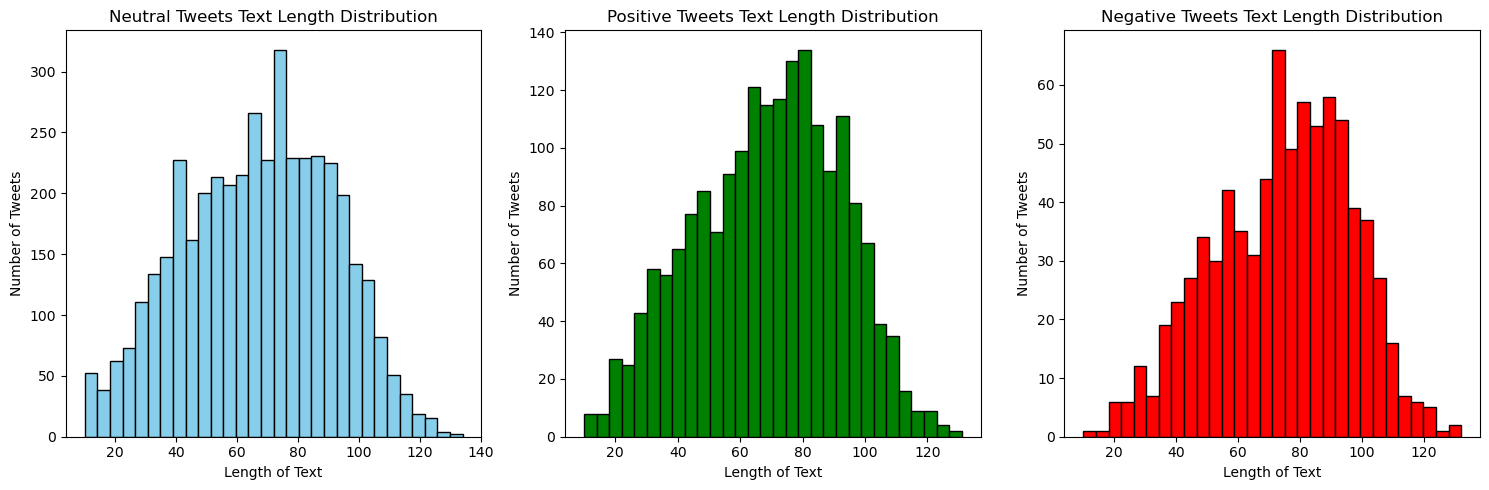

In [20]:
#EDA

import matplotlib.pyplot as plt

# Calculating the lengths of the cleaned text for each sentiment
neutral_lengths = Twitter_Dataset_Final[Twitter_Dataset_Final['sentiment'] == '0']['text_cleaned'].apply(len)
positive_lengths = Twitter_Dataset_Final[Twitter_Dataset_Final['sentiment'] == '1']['text_cleaned'].apply(len)
negative_lengths = Twitter_Dataset_Final[Twitter_Dataset_Final['sentiment'] == '-1']['text_cleaned'].apply(len)

plt.figure(figsize=(15,5))

# Plotting the histogram for Neutral Tweets
plt.subplot(1,3,1)
plt.hist(neutral_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Neutral Tweets Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Number of Tweets')

# Plotting the histogram for Positive Tweets
plt.subplot(1,3,2)
plt.hist(positive_lengths, bins=30, color='green', edgecolor='black')
plt.title('Positive Tweets Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Number of Tweets')

# Plotting the histogram for Negative Tweets
plt.subplot(1,3,3)
plt.hist(negative_lengths, bins=30, color='red', edgecolor='black')
plt.title('Negative Tweets Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Number of Tweets')

plt.tight_layout()
plt.savefig('C:\\Users\\SAHIL BHARTI\\Desktop\\Dissertation docs\\Results\\length_of_text.jpg')
plt.show()



In [21]:
# Stemming and Lemmatization

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def stemming(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def lemmatization(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Stemming
Twitter_Dataset_Final['stemmed_tokens'] = Twitter_Dataset_Final['tokens'].apply(stemming)
# Lemmatization 
Twitter_Dataset_Final['lemmatized_tokens'] = Twitter_Dataset_Final['tokens'].apply(lemmatization)



# Print the dataframe
print(Twitter_Dataset_Final.head())

                                                text sentiment  text_length  \
0  Two places I'd invest all my money if I could:...         1           83   
1  Awesome! Google driverless cars will help the ...         1           95   
2  If Google maps can't keep up with road constru...        -1          116   
3  Autonomous cars seem way overhyped given the t...        -1          118   
4  Just saw Google self-driving car on I-34. It w...         0           72   

                                        text_cleaned  \
0  two places id invest money could 3d printing s...   
1  awesome google driverless cars help blind trav...   
2  google maps cant keep road construction suppos...   
3  autonomous cars seem way overhyped given techn...   
4  saw google selfdriving car i34 painted green blue   

                                              tokens  \
0  [two, places, id, invest, money, could, 3d, pr...   
1  [awesome, google, driverless, cars, help, blin...   
2  [google, maps, ca

In [22]:
#Feature extraction

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialising Bag of Words CountVectorizer
vectorizer_BoW = CountVectorizer()

# Fitting and transforming the stemmed tokens(BoW)
stemmer_BoW = vectorizer_BoW.fit_transform(Twitter_Dataset_Final['stemmed_tokens'].apply(' '.join))

# Initialising TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fitting and transforming the stemmed tokens(BoW)
tfidf_stemmed = vectorizer_tfidf.fit_transform(Twitter_Dataset_Final['stemmed_tokens'].apply(' '.join))

# Repeating for lemmatized tokens
lemmatized_BoW = vectorizer_BoW.fit_transform(Twitter_Dataset_Final['lemmatized_tokens'].apply(' '.join))
tfidf_lemmatized = vectorizer_tfidf.fit_transform(Twitter_Dataset_Final['lemmatized_tokens'].apply(' '.join))



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Using TF-IDF features for stemmed tokens
X = tfidf_stemmed
y = Twitter_Dataset_Final['sentiment']

from imblearn.over_sampling import SMOTE

# Defining SMOTE
apply_smote = SMOTE()

# Applying SMOTE
X_smote, y_smote = apply_smote.fit_resample(X, y)


# Splitting the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Initializing the model
Random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Training the model
Random_forest_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = Random_forest_model.predict(X_test)

# Printing the report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.97      0.92      0.94       820
           0       0.75      0.89      0.82       851
           1       0.88      0.77      0.82       876

    accuracy                           0.86      2547
   macro avg       0.87      0.86      0.86      2547
weighted avg       0.87      0.86      0.86      2547



In [24]:

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.2, random_state=42)

# Training the model - Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Predicting sentiment from test data - Random Forest
y_pred_r_f = random_forest_model.predict(X_test)

# Evaluating the Random Forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_r_f)
print("Random Forest Accuracy:", accuracy_random_forest)
print(classification_report(y_test, y_pred_r_f))


# Training the model - Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predicting sentiment from test data - Naive Bayes
y_pred_n_b = naive_bayes_model.predict(X_test)

# Evaluating the Naive Bayes model
accuracy_naive_bayes = accuracy_score(y_test, y_pred_n_b)
print("Naive Bayes Accuracy:", accuracy_naive_bayes)
print(classification_report(y_test, y_pred_n_b))

# Training the model - Support Vector Machine(SVM) 
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predicting sentiment from test data - SVM
y_pred_s_v_m = svm_model.predict(X_test)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_s_v_m))



Random Forest Accuracy: 0.8586572438162544
              precision    recall  f1-score   support

          -1       0.97      0.92      0.95       820
           0       0.75      0.88      0.81       851
           1       0.88      0.78      0.82       876

    accuracy                           0.86      2547
   macro avg       0.87      0.86      0.86      2547
weighted avg       0.87      0.86      0.86      2547

Naive Bayes Accuracy: 0.7675696898311739
              precision    recall  f1-score   support

          -1       0.77      0.94      0.84       820
           0       0.83      0.54      0.65       851
           1       0.73      0.83      0.78       876

    accuracy                           0.77      2547
   macro avg       0.78      0.77      0.76      2547
weighted avg       0.78      0.77      0.76      2547

SVM Accuracy: 0.8590498625834315
              precision    recall  f1-score   support

          -1       0.98      0.92      0.95       820
           0

In [25]:
# Topic Modelling

from sklearn.decomposition import LatentDirichletAllocation

# adding custom stopwords as words such as "google", "car", "autonomous" etc would not make much sense as positive or negative sentiments

topic_stopwords = ["google", "car", "cars", "selfdriving", "driverless", "driving", "self", "autonomous", "vehicle"]  
total_stopwords = stopwords.words('english') + topic_stopwords

# Initializing CountVectorizer with total stopwords and parameters
vectorizer_BoW_LDA = CountVectorizer(stop_words=total_stopwords, max_df=0.8, min_df=5, token_pattern=r'\b\w{3,}\b')

# Fitting and transforming the lemmatized tokens
lemmatized_BoW_LDA = vectorizer_BoW_LDA.fit_transform(Twitter_Dataset_Final['lemmatized_tokens'].apply(' '.join))

# Splitting the dataset into positive and negative tweets
positive_tweet = Twitter_Dataset_Final[Twitter_Dataset_Final['sentiment'] == '1']['lemmatized_tokens'].apply(' '.join)
negative_tweet = Twitter_Dataset_Final[Twitter_Dataset_Final['sentiment'] == '-1']['lemmatized_tokens'].apply(' '.join)

# Transforming the tweets
positive_vec = vectorizer_BoW_LDA.transform(positive_tweet)
negative_vec = vectorizer_BoW_LDA.transform(negative_tweet)

# Initializing LDA model
lda_topic_model = LatentDirichletAllocation(n_components=5, random_state=100)

# Applying LDA to positive tweets
lda_topic_model.fit(positive_vec)
print("Positive Sentiment Topics:")
for idx, topic in enumerate(lda_topic_model.components_):
    print(f"Topic #{idx + 1}:")
    print(" ".join([vectorizer_BoW_LDA.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    print()

# Applying LDA to negative tweets
lda_topic_model.fit(negative_vec)
print("Negative Sentiment Topics:")
for idx, topic in enumerate(lda_topic_model.components_):
    print(f"Topic #{idx + 1}:")
    print(" ".join([vectorizer_BoW_LDA.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    print()


Positive Sentiment Topics:
Topic #1:
traffic really could make want wait cant one see future

Topic #2:
want thats going need uber look drive driver like cool

Topic #3:
technology love one think drive could city want street need

Topic #4:
hope first glass people would way get take cool saw

Topic #5:
verge see awesome amp drive soon california come enough cant

Negative Sentiment Topics:
Topic #1:
like dont one never wheel trust would get future see

Topic #2:
passed way first law thing going need road like driver

Topic #3:
people make street driver need would could want dont think

Topic #4:
like saw one driver way dont drive take get people

Topic #5:
like accident tech idea cant going one think time problem



In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

# 1. Tokenization and Padding
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 29
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(Twitter_Dataset_Final['lemmatized_tokens'].astype(str))
sequences = tokenizer.texts_to_sequences(Twitter_Dataset_Final['lemmatized_tokens'].astype(str))
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, truncating='post', padding='post')
print(tokenizer.num_words)

X = padded_sequences
y = Twitter_Dataset_Final['sentiment'].values

# Applying LSTM Model's Embedding Layer
model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
    
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


y_train = y_train.astype(int)
y_test = y_test.astype(int)

y_train[y_train == -1] = 0
y_train[y_train == 1] = 2
y_train[y_train == 0] = 1

y_test[y_test == -1] = 0
y_test[y_test == 1] = 2
y_test[y_test == 0] = 1

# 4. Training the LSTM Model
history = model.fit(X_train , y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

10000
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 29, 64)            42240     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1077443 (4.11 MB)
Trainable params: 

In [27]:
# Get model predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Generate and print the classification report
report = classification_report(y_test, y_pred_classes)
print(report)

In [28]:
# creating a wordcloud

from wordcloud import WordCloud

Twitter_Dataset_Final['lemmatized_text'] = Twitter_Dataset_Final['lemmatized_tokens'].apply(' '.join)

lemmatized_data = " ".join(Twitter_Dataset_Final['lemmatized_text'])

# Generating word cloud with a circular mask
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100,
                      contour_width=3, contour_color='steelblue').generate(lemmatized_data)

# Displaying the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('C:\\Users\\SAHIL BHARTI\\Desktop\\Dissertation docs\\Results\\final_word_cloud.jpg')
plt.show()
